<a href="https://colab.research.google.com/github/salarMokhtariL/American-Sign-Language-MNIST-Gesture-Recognition-CNN/blob/main/American_Sign_Language_MNIST_%26_Gesture_Recongition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American Sign Language MNIST & Gesture Recongition CNN

> By Salar Moktari Laleh

# Importing Required Libraries
importing necessary libraries for data cleaning, preprocessing, and model building.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.patheffects as path_effects

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import cv2
from google.colab.patches import cv2_imshow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Loading the Dataset

load the train and test datasets using Pandas.



In [2]:
# Train datasets

train = pd.read_csv("https://github.com/salarMokhtariL/American-Sign-Language-MNIST-Gesture-Recognition-CNN/raw/main/Dataset/sign_mnist_train.csv")

# Test datasets

test = pd.read_csv("https://raw.githubusercontent.com/salarMokhtariL/American-Sign-Language-MNIST-Gesture-Recognition-CNN/main/Dataset/sign_mnist_test.csv")

In [3]:
# Training datasets

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Get training labels

labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

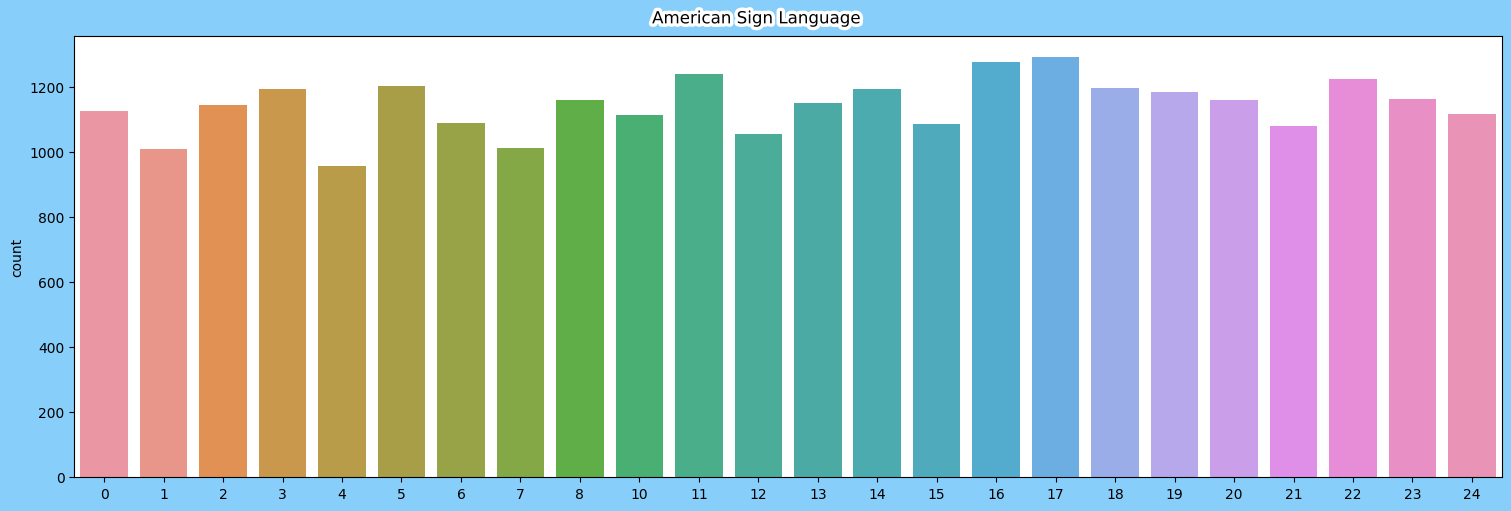

In [6]:
# Plot

plt.figure(figsize = (15,5), facecolor='lightskyblue', layout='constrained', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()] )
sns.countplot(x = labels)

plt.suptitle('American Sign Language').set_path_effects([path_effects.Stroke(linewidth=5, foreground='white'),
                       path_effects.Normal()])

In [7]:
# Drop traing labels from dataset for separate it

train.drop('label', axis = 1, inplace = True)

In [8]:
# Extract image data from each row in datasets

images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


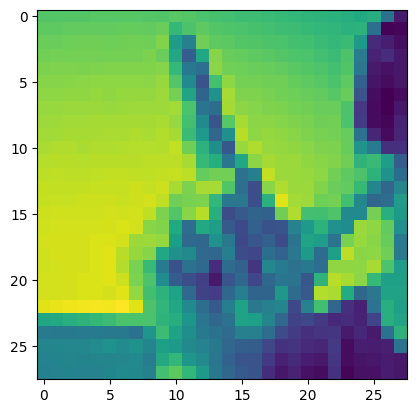

In [11]:
# Inspect an image

index = 40
print(labels[index])
plt.imshow(images[index].reshape(28,28))

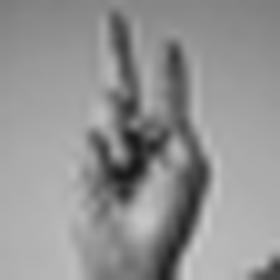

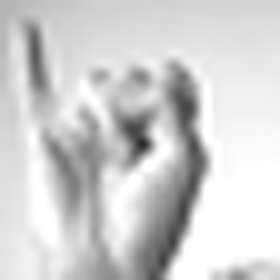

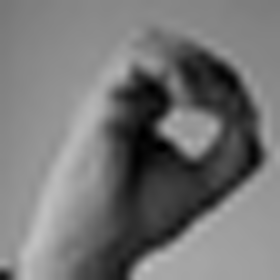

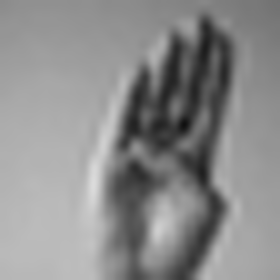

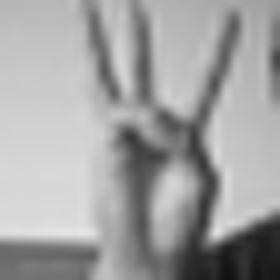

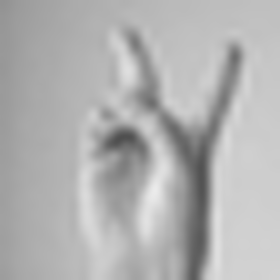

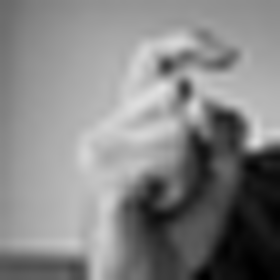

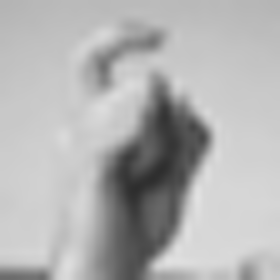

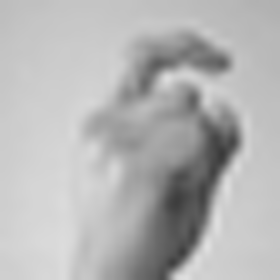

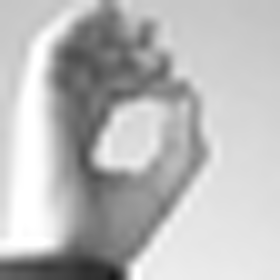

In [12]:
# Using OpenCV to view random images from dataset

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10,
                        interpolation=cv2.INTER_CUBIC)
    cv2_imshow(sample)


In [13]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3,
                                                    random_state=101)

In [14]:
# Strart loading tensorflow modules
# define batch size

batch_size = 128
num_classes = 24
epochs = 10

In [15]:
# Scale images

x_train = x_train/255
x_test = x_test/255

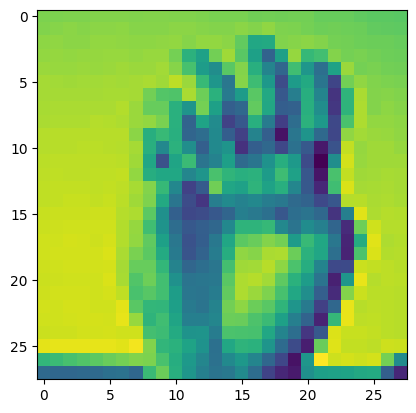

In [16]:
# Reshape into the size required by TF & Keras

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[5].reshape(28,28))